<a href="https://colab.research.google.com/github/akshitachhabra2717/gdp-dashboard/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Fraud.csv')

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1293899,136,CASH_OUT,12809.71,C1120285092,0.0,0.00,C1162407908,841277.06,854086.77,0.0,0.0
1293900,136,CASH_OUT,333540.50,C1735479201,0.0,0.00,C393411581,519734.76,853275.26,0.0,0.0
1293901,136,CASH_OUT,382561.40,C154556816,0.0,0.00,C760238206,1404351.28,1786912.68,0.0,0.0
1293902,136,CASH_OUT,35033.85,C68287401,0.0,0.00,C575933463,172459.67,207493.52,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293904 entries, 0 to 1293903
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1293904 non-null  int64  
 1   type            1293904 non-null  object 
 2   amount          1293904 non-null  float64
 3   nameOrig        1293904 non-null  object 
 4   oldbalanceOrg   1293903 non-null  float64
 5   newbalanceOrig  1293903 non-null  float64
 6   nameDest        1293903 non-null  object 
 7   oldbalanceDest  1293903 non-null  float64
 8   newbalanceDest  1293903 non-null  float64
 9   isFraud         1293903 non-null  float64
 10  isFlaggedFraud  1293903 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 108.6+ MB


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
df.dropna(inplace=True)
df['amount'] = df['amount'].astype(int)
df['oldbalanceOrg'] = df['oldbalanceOrg'].astype(int)
df['newbalanceOrig'] = df['newbalanceOrig'].astype(int)
df['oldbalanceDest'] = df['oldbalanceDest'].astype(int)
df['newbalanceDest'] = df['newbalanceDest'].astype(int)
df['isFraud'] = df['isFraud'].astype(int)
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype(int)

In [ ]:
#fill missinf values
df["amount"].fillna(df["amount"].median(), inplace=True)
df["oldbalanceOrg"].fillna(df["oldbalanceOrg"].median(), inplace=True)
df["newbalanceOrig"].fillna(df["newbalanceOrig"].median(), inplace=True)
df["oldbalanceDest"].fillna(df["oldbalanceDest"].median(), inplace=True)
df["newbalanceDest"].fillna(df["newbalanceDest"].median(), inplace=True)
df["isFraud"].fillna(df["isFraud"].median(), inplace=True)
df["isFlaggedFraud"].fillna(df["isFlaggedFraud"].median(), inplace=True)

/tmp/ipython-input-9-2222677961.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["amount"].fillna(df["amount"].median(), inplace=True)
/tmp/ipython-input-9-2222677961.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
df['nameOrig'] = df['nameOrig'].fillna(df['nameOrig'].mode())
df['nameDest'] = df['nameDest'].fillna(df['nameDest'].mode())

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


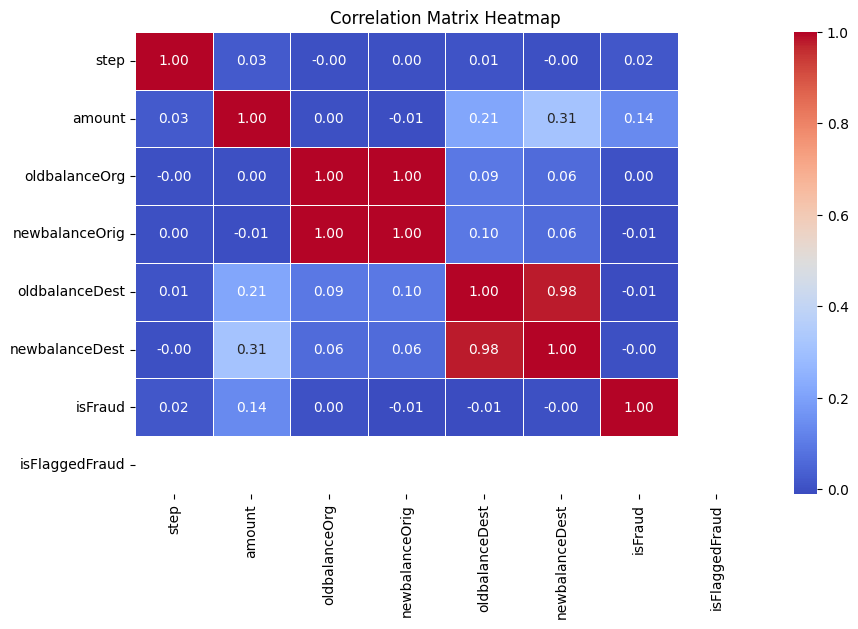

In [ ]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

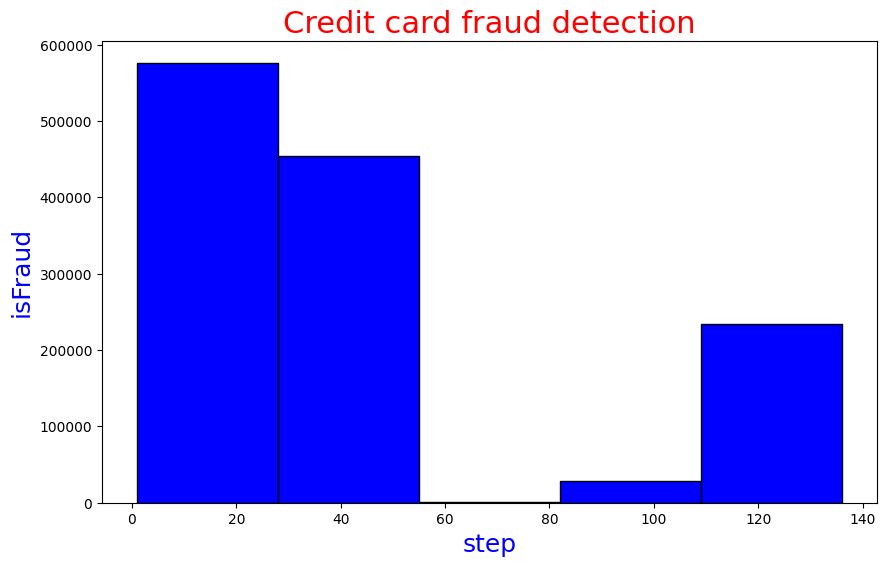

In [ ]:
# Histogram Chart -
plt.figure(figsize=(10,6))
plt.hist(df["step"],bins=5,color="blue",edgecolor="black")
plt.title("Credit card fraud detection",color="red",fontsize=22)
plt.xlabel("step",color="blue",fontsize=18)
plt.ylabel("isFraud",color="blue",fontsize=18)
plt.show()

/tmp/ipython-input-14-1116717424.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="isFraud", y="oldbalanceOrg", data=df, estimator='mean', palette="viridis")


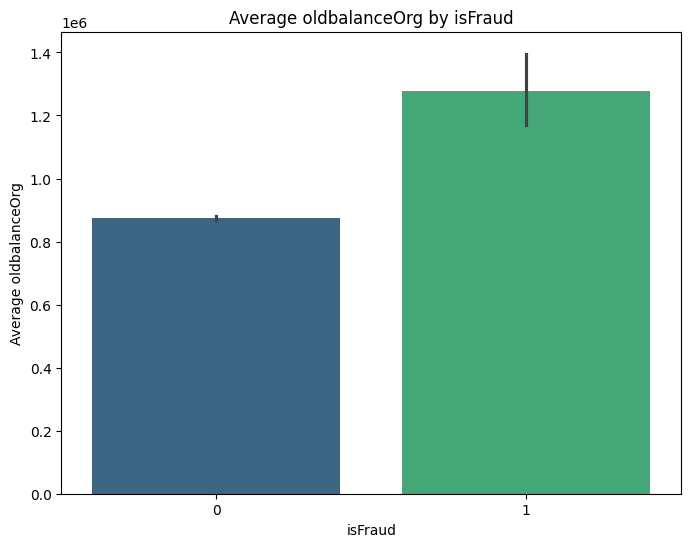

<Figure size 640x480 with 0 Axes>

In [ ]:
#Bar plot
plt.figure(figsize=(8,6))
sns.barplot(x="isFraud", y="oldbalanceOrg", data=df, estimator='mean', palette="viridis")

plt.title("Average oldbalanceOrg by isFraud")
plt.xlabel("isFraud")
plt.ylabel("Average oldbalanceOrg")
plt.show()
plt.tight_layout()
plt.show()

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839,C1231006815,170136,160296,M1979787155,0,0,0,0
1,1,PAYMENT,1864,C1666544295,21249,19384,M2044282225,0,0,0,0
2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1,0
3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1,0
4,1,PAYMENT,11668,C2048537720,41554,29885,M1230701703,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1293898,136,CASH_OUT,87768,C409123094,0,0,C1359953204,414418,502186,0,0
1293899,136,CASH_OUT,12809,C1120285092,0,0,C1162407908,841277,854086,0,0
1293900,136,CASH_OUT,333540,C1735479201,0,0,C393411581,519734,853275,0,0
1293901,136,CASH_OUT,382561,C154556816,0,0,C760238206,1404351,1786912,0,0


In [ ]:
def detect_outlier(data,col):
  Q1=data[col].quantile(0.25)
  Q3=data[col].quantile(0.75)

  IQR=Q3-Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  return data[(data[col]>=lower) & (data[col]<=upper)]
Outliers_age=detect_outlier(df,"amount")

In [ ]:
Outliers_age

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839,C1231006815,170136,160296,M1979787155,0,0,0,0
1,1,PAYMENT,1864,C1666544295,21249,19384,M2044282225,0,0,0,0
2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1,0
3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1,0
4,1,PAYMENT,11668,C2048537720,41554,29885,M1230701703,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1293898,136,CASH_OUT,87768,C409123094,0,0,C1359953204,414418,502186,0,0
1293899,136,CASH_OUT,12809,C1120285092,0,0,C1162407908,841277,854086,0,0
1293900,136,CASH_OUT,333540,C1735479201,0,0,C393411581,519734,853275,0,0
1293901,136,CASH_OUT,382561,C154556816,0,0,C760238206,1404351,1786912,0,0


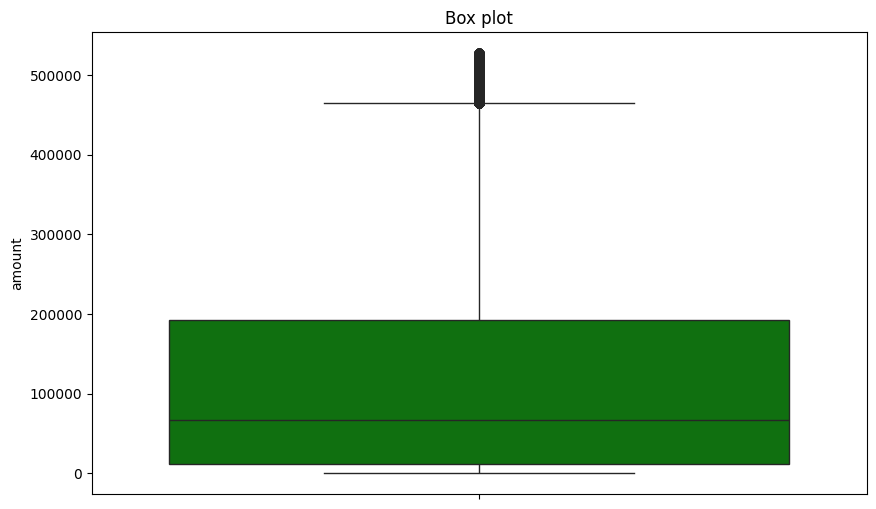

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(y=Outliers_age["amount"],color="green")
plt.title("Box plot")
plt.show()

In [ ]:
def detect_outlier(data,col):
  Q1=data[col].quantile(0.25)
  Q3=data[col].quantile(0.75)

  IQR=Q3-Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  return data[(data[col]<lower) | (data[col]>upper)]
Outliers_age=detect_outlier(df,"amount")

In [ ]:
Outliers_age

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
85,1,TRANSFER,1505626,C926859124,0,0,C665576141,29031,5515763,0,0
86,1,TRANSFER,554026,C1603696865,0,0,C766572210,579285,0,0,0
88,1,TRANSFER,761507,C412788346,0,0,C1590550415,1280036,19169204,0,0
89,1,TRANSFER,1429051,C1520267010,0,0,C1590550415,2041543,19169204,0,0
93,1,TRANSFER,583848,C1839168128,0,0,C1286084959,667778,2107778,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1293835,136,CASH_IN,598744,C1705859230,11056,609800,C1544522168,118276,0,0,0
1293839,136,TRANSFER,2363127,C1033494331,20687,0,C1979480361,30014,2393141,0,0
1293850,136,CASH_OUT,592690,C1180083928,113928,0,C1004330633,4033611,4626302,0,0
1293870,136,TRANSFER,3263443,C1406501579,3263443,0,C106008304,0,0,1,0


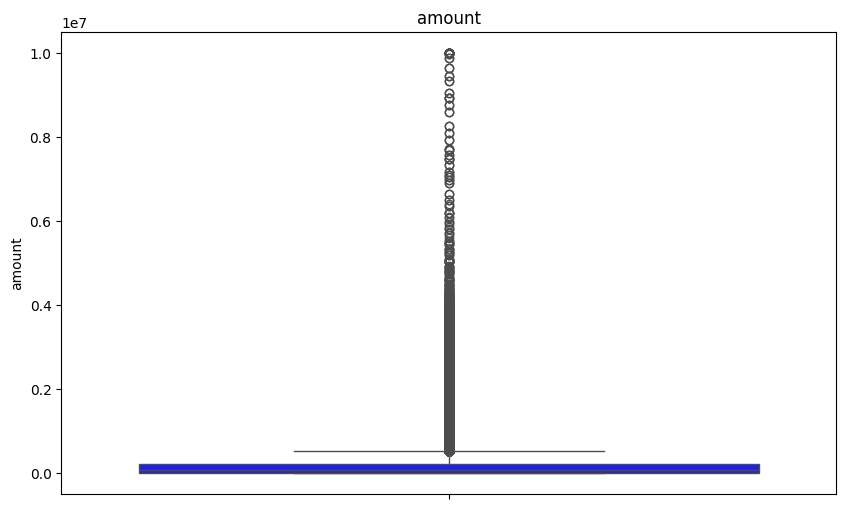

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df,y="amount",color="Blue")
plt.title("amount")
plt.show()

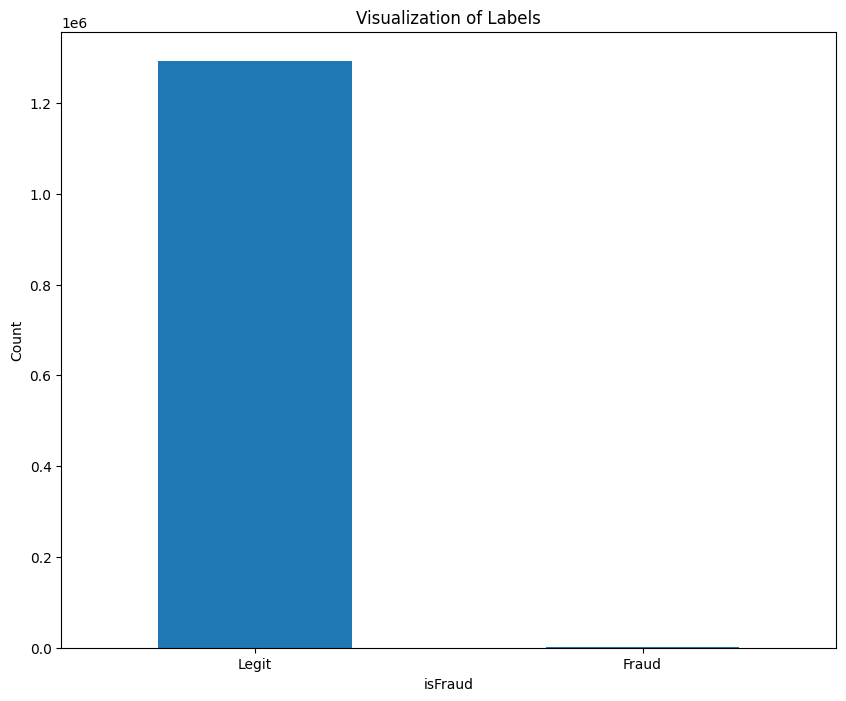

In [ ]:
plt.figure(figsize=(10,8))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [ ]:
new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839,C1231006815,170136,160296,M1979787155,0,0,0,0
1,1,PAYMENT,1864,C1666544295,21249,19384,M2044282225,0,0,0,0
2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1,0
3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1,0
4,1,PAYMENT,11668,C2048537720,41554,29885,M1230701703,0,0,0,0


#Label Encoding

In [ ]:
objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [ ]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839,C1231006815,170136,160296,M1979787155,0,0,0,0
1,1,PAYMENT,1864,C1666544295,21249,19384,M2044282225,0,0,0,0
2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1,0
3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1,0
4,1,PAYMENT,11668,C2048537720,41554,29885,M1230701703,0,0,0,0


In [ ]:
new_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.293903e+06,1.293903e+06,1.293903e+06,1.293903e+06,1.293903e+06,1.293903e+06,1.293903e+06,1293903.0
mean,4.648664e+01,1.630854e+05,8.754027e+05,8.959588e+05,9.867754e+05,1.118626e+06,1.196380e-03,0.0
std,4.288043e+01,2.731326e+05,2.972175e+06,3.008551e+06,2.304700e+06,2.416089e+06,3.456805e-02,0.0
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.600000e+01,1.286800e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,3.500000e+01,7.864500e+04,1.553100e+04,0.000000e+00,1.301760e+05,2.240190e+05,0.000000e+00,0.0
75%,4.400000e+01,2.187505e+05,1.305020e+05,1.714605e+05,9.306010e+05,1.158112e+06,0.000000e+00,0.0
max,1.360000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.220740e+07,4.220740e+07,1.000000e+00,0.0


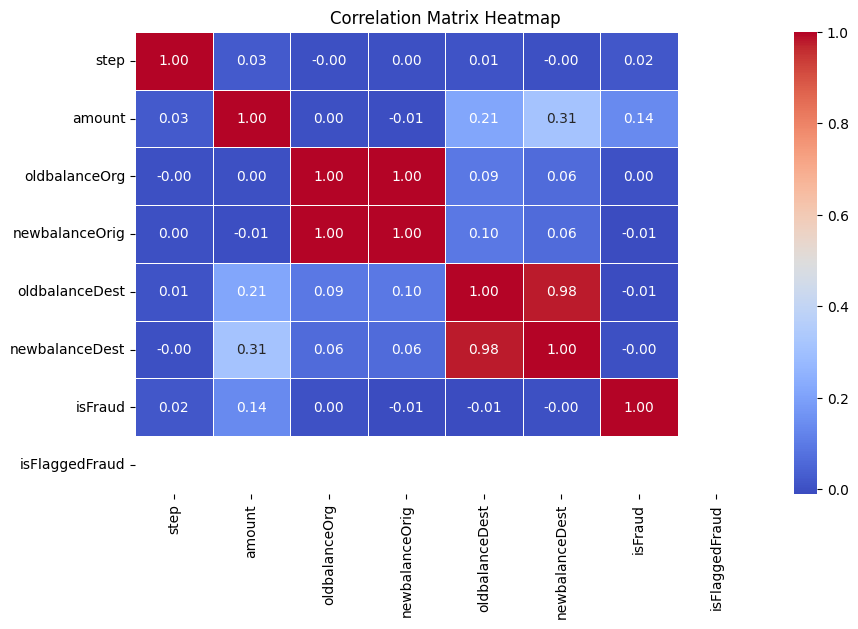

In [ ]:
corr_matrix = new_df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['isFraud', 'nameOrig', 'nameDest'])
y = df['isFraud']

In [ ]:
# Split the data
(x_train, x_test, y_train, y_test) = train_test_split(X, y, test_size= 0.3, random_state= 42)
print("Shape of X_train: ", x_train.shape)
print("Shape of X_test: ", x_test.shape)

Shape of X_train:  (905732, 8)
Shape of X_test:  (388171, 8)


In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Model Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred=lr_model.predict(x_test_scaled)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score #accuracy
Accuracy=accuracy_score(y_test,y_pred)
print(Accuracy*100)

99.90983355273836


In [ ]:
print(y_test.value_counts())

isFraud
0    387718
1       453
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[387697     21]
 [   329    124]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    387718
           1       0.86      0.27      0.41       453

    accuracy                           1.00    388171
   macro avg       0.93      0.64      0.71    388171
weighted avg       1.00      1.00      1.00    388171



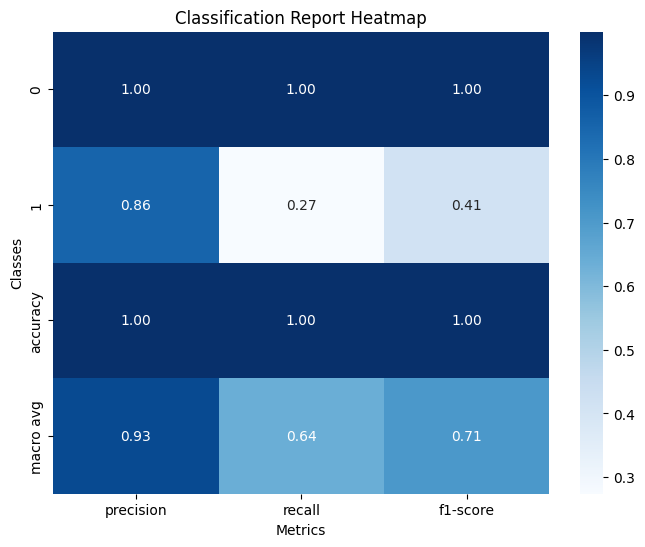

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
df_report = pd.DataFrame(report).transpose()

# Plot as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.ylabel("Classes")
plt.xlabel("Metrics")
plt.show()

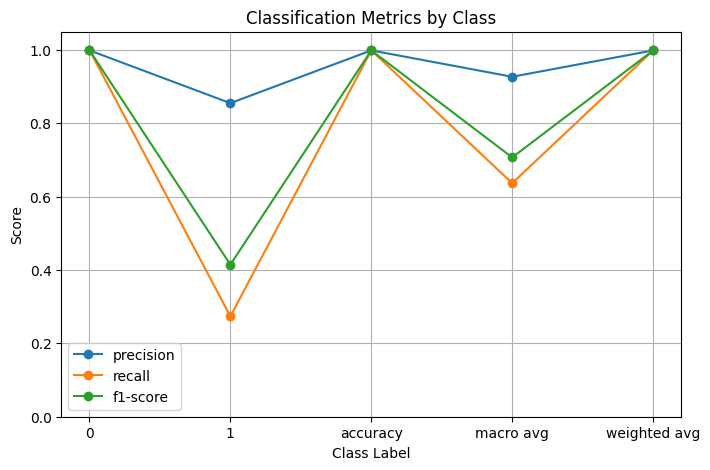

In [ ]:
plt.figure(figsize=(8, 5))
for metric in ['precision', 'recall', 'f1-score']:
    plt.plot(df_report.index, df_report[metric], marker='o', label=metric)

plt.title("Classification Metrics by Class")
plt.xlabel("Class Label")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df_model=DecisionTreeClassifier()
df_model.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred1=df_model.predict(x_test_scaled)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    387718
           1       0.85      0.84      0.84       453

    accuracy                           1.00    388171
   macro avg       0.92      0.92      0.92    388171
weighted avg       1.00      1.00      1.00    388171



In [ ]:
from sklearn.metrics import accuracy_score
Accuracy=accuracy_score(y_test,y_pred1)
print(Accuracy*100)

99.96367580267459


In [ ]:
print(y_test.value_counts())

isFraud
0    387718
1       453
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [ ]:
#evaluate model
y_pred2=rf_model.predict(x_test_scaled)
print(y_pred2)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    387718
           1       0.98      0.77      0.86       453

    accuracy                           1.00    388171
   macro avg       0.99      0.89      0.93    388171
weighted avg       1.00      1.00      1.00    388171



In [ ]:
from sklearn.metrics import accuracy_score
Accuracy=accuracy_score(y_test,y_pred2)
print(Accuracy*100)

99.97166197371777
